# Regression

### Import necessary libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Load the dataset

In [50]:
y = np.load('data.npy')

## 2.1 Split the dataset into training and testing parts

### Generate X values corresponding to y

In [51]:
X = np.linspace(-0.5, 12.5, len(y))

### Split the data into training and testing sets (80% training, 20% testing)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

### Plot the training and testing data

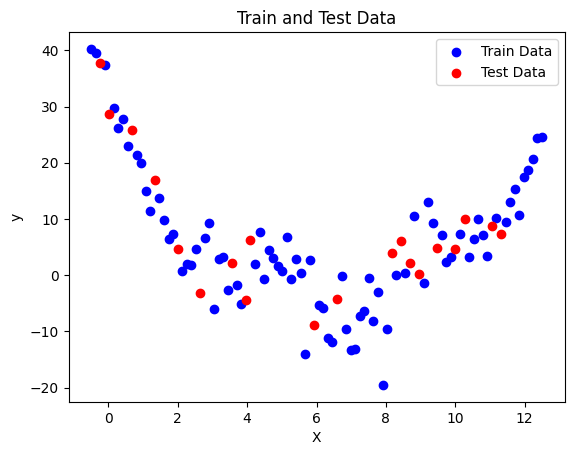

In [53]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')  # Training data
plt.scatter(X_test, y_test, color='red', label='Test Data')     # Testing data
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train and Test Data')
plt.show()

## 2.3 Train a first-degree linear regression model (without using built-in functions)

### Add bias term (1) to the features for the regression model

In [54]:
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]  # Adding bias
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]

### Compute the coefficients using the Normal Equation

In [55]:
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

### Predictions

In [56]:
y_pred_train = X_train_b @ theta
y_pred_test = X_test_b @ theta

### Calculate the errors (MSE)

In [57]:
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

### Print the MSE values

In [58]:
print(f"MSE (Training): {mse_train:.4f}")
print(f"MSE (Testing): {mse_test:.4f}")

MSE (Training): 141.0907
MSE (Testing): 109.5645


## 2.4 Training with increasing amounts of data

### List to store errors at each step

In [59]:
errors_train = []
errors_test = []

### Loop over the training samples, adding one sample at a time

In [60]:
for i in range(1, len(X_train) + 1):
    X_train_partial = X_train[:i]  # Select the first i samples
    y_train_partial = y_train[:i]

    # Train the model on the selected data
    X_train_b_partial = np.c_[np.ones(X_train_partial.shape[0]), X_train_partial]
    theta_partial = np.linalg.pinv(X_train_b_partial.T @ X_train_b_partial) @ X_train_b_partial.T @ y_train_partial

    # Predictions
    y_pred_train_partial = X_train_b_partial @ theta_partial
    y_pred_test_partial = X_test_b @ theta_partial

    # Calculate the errors (MSE)
    errors_train.append(np.mean((y_train_partial - y_pred_train_partial) ** 2))
    errors_test.append(np.mean((y_test - y_pred_test_partial) ** 2))

### Plot error vs. number of training samples

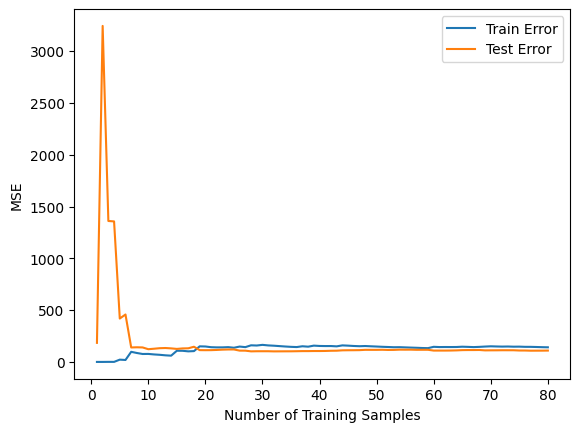

In [61]:
plt.plot(range(1, len(X_train) + 1), errors_train, label='Train Error')
plt.plot(range(1, len(X_train) + 1), errors_test, label='Test Error')
plt.legend()
plt.xlabel('Number of Training Samples')
plt.ylabel('MSE')
plt.show()

## 2.6 Adding polynomial features to the model

In [62]:
errors_poly = []
degrees = [1, 2, 3, 4, 5]  # Testing polynomial degrees 1 through 5

for degree in degrees:
    # Reshape X_train and X_test to 2D arrays
    X_train_reshaped = X_train.reshape(-1, 1)
    X_test_reshaped = X_test.reshape(-1, 1)

    poly = PolynomialFeatures(degree)

    # Fit and transform the training data, and transform the test data
    X_train_poly = poly.fit_transform(X_train_reshaped)
    X_test_poly = poly.transform(X_test_reshaped)

    # Train the linear regression model using the normal equation
    theta_poly = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

    # Make predictions
    y_pred_train_poly = X_train_poly @ theta_poly
    y_pred_test_poly = X_test_poly @ theta_poly

    # Calculate errors (MSE)
    errors_poly.append(np.mean((y_test - y_pred_test_poly) ** 2))

### Plot error vs. polynomial degree

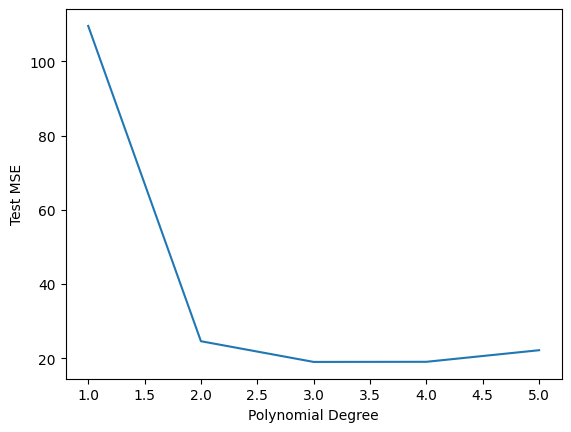

In [63]:
plt.plot(degrees, errors_poly)
plt.xlabel('Polynomial Degree')
plt.ylabel('Test MSE')
plt.show()

## 2.7 Selecting and comparing three regression algorithms from Scikit-learn

### Define the models to test

In [64]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

### List to store errors at each step

In [65]:
errors = {}

### Train and test each model

In [66]:
for model, name in zip(models, model_names):
    # Reshape X_train and X_test to be 2D arrays
    X_train_reshaped = X_train.reshape(-1, 1)
    X_test_reshaped = X_test.reshape(-1, 1)

    # Fit the model to the training data
    model.fit(X_train_reshaped, y_train)

    # Make predictions on the test data
    y_pred_test = model.predict(X_test_reshaped)

    # Calculate the mean squared error (MSE)
    errors[name] = np.mean((y_test - y_pred_test) ** 2)

### Print the errors for comparison

In [67]:
print(errors)

{'Linear Regression': 109.56446248220216, 'Decision Tree': 29.762187802114557, 'Random Forest': 22.58439486955469}


## Bonus: Using Regularization for polynomial models

### Regularized Polynomial Regression (Ridge)

In [68]:
def ridge_regression(X_train, y_train, X_test, y_test, degree, lambda_):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))  # Transform training data to polynomial features
    X_test_poly = poly.transform(X_test.reshape(-1, 1))  # Transform test data to polynomial features

    # Add L2 regularization (Ridge regularization)
    I = np.eye(X_train_poly.shape[1])  # Identity matrix
    I[0, 0] = 0  # No regularization on the bias term (first element)

    # Solve the ridge regression equation
    theta = np.linalg.inv(X_train_poly.T @ X_train_poly + lambda_ * I) @ X_train_poly.T @ y_train

    # Make predictions on the test data
    y_pred_test = X_test_poly @ theta

    # Calculate MSE
    mse = np.mean((y_test - y_pred_test) ** 2)

    return theta, y_pred_test, mse  # Return the coefficients, predictions, and MSE

### Regularization parameter (lambda)

In [69]:
lambda_ = 0.1  # Regularization strength
errors_ridge = []
degrees = [1, 2, 3, 4, 5]  # Test polynomial degrees from 1 to 5

### Loop through different polynomial degrees

In [70]:
for degree in degrees:
    _, _, mse_ridge = ridge_regression(X_train, y_train, X_test, y_test, degree, lambda_)
    errors_ridge.append(mse_ridge)  # Store the MSE for each degree

### Plot the error vs polynomial degree

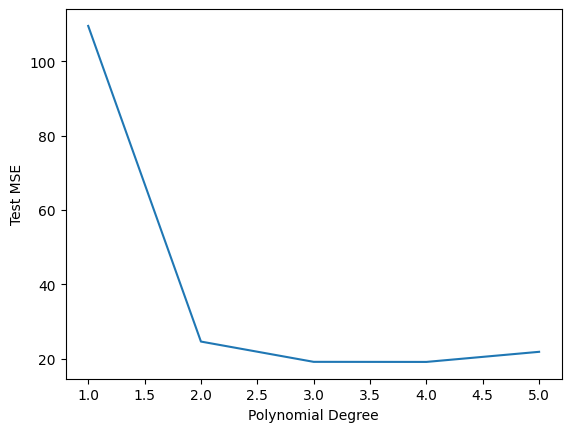

In [71]:
plt.plot(degrees, errors_ridge)
plt.xlabel('Polynomial Degree')
plt.ylabel('Test MSE')
plt.show()